In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
from tkinter import Tk
from tkinter.filedialog import askopenfilename

In [3]:
from preprocessing_layers import RandomShear, RandomShift, ImageTransformation, RandomChannelShift, RandomBrightness

In [4]:
root = Tk()
root.withdraw()
root.attributes('-topmost', True)
filepath = askopenfilename()

In [5]:
image = cv2.imread(filepath)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)[None]

In [6]:
def plot_layer(p_layer, nrows, ncols):
    plt.figure(figsize=(ncols * 3, nrows * 3))
    for i in range(nrows):
        for j in range(ncols):
            plt.subplot(nrows, ncols, i * ncols + j + 1)
            plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
            plt.imshow(p_layer((image / 255.), training=True)[0])
    plt.show()
    plt.close()

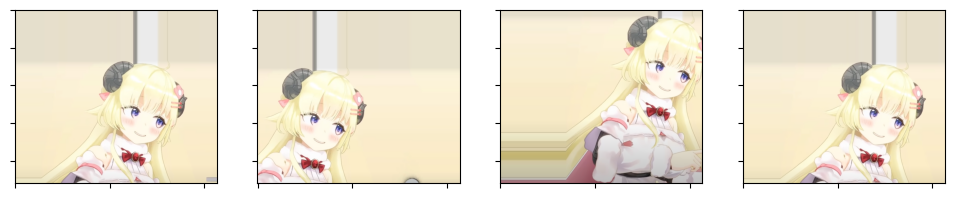

In [7]:
plot_layer(RandomShift(width_shift_range=0.2, height_shift_range=0.2), 1, 4)

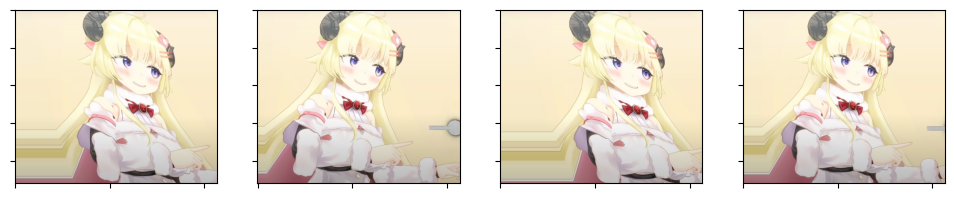

In [8]:
plot_layer(RandomShear(shear_range=0.3), 1, 4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


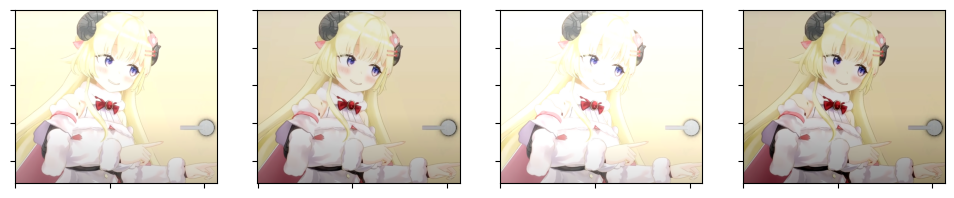

In [9]:
plot_layer(RandomBrightness(brightness=0.2), 1, 4)

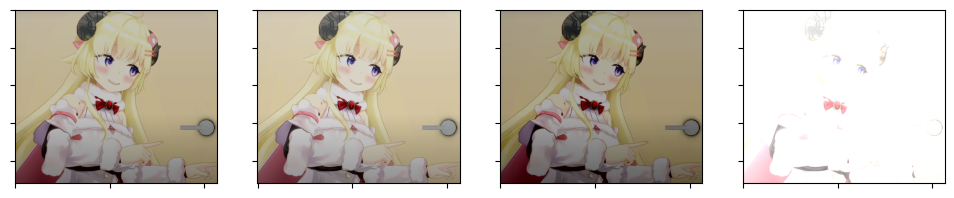

In [10]:
plot_layer(RandomChannelShift(shift_range=0.5), 1, 4)

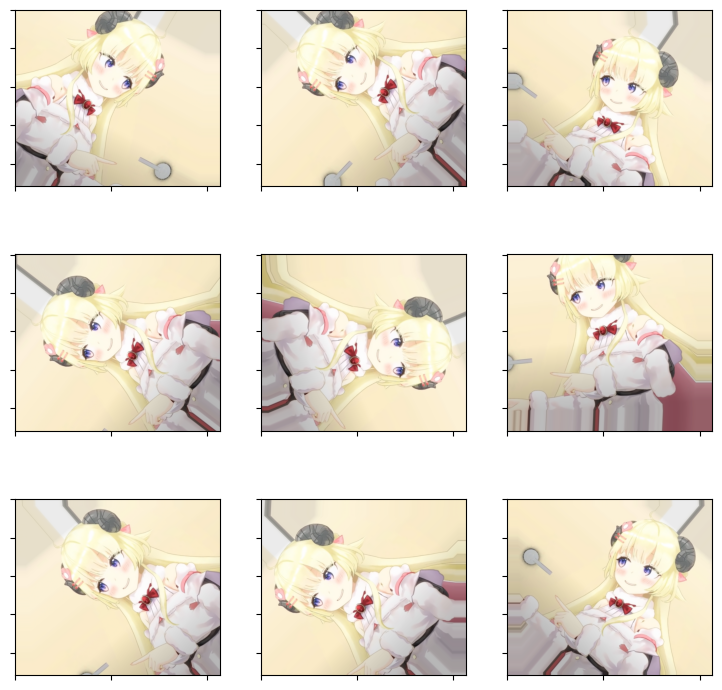

In [11]:
train_generator_args = dict(rotation_range=0.2,
                            width_shift_range=0.05,
                            height_shift_range=0.05,
                            shear_range=0.05,
                            zoom_range=0.05,
                            horizontal_flip=True,
                            fill_mode='nearest')
transform = ImageTransformation(**train_generator_args)
plot_layer(transform, 3, 3)